In [164]:
import subprocess
import json
import re
import numpy as np
import scipy as sp
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [160]:
# dont know how to set linux env variables from subprocess so bench is run from script
def runBenchmarks(weights, c, n):
    args = "./run.sh " + ','.join(str(x) for x in weights) + "," + str(c) + " " + str(n)
    p = subprocess.Popen(args, stdout=subprocess.PIPE, shell=True)
    (output, err) = p.communicate()
    return output

# get lir phase compilation time from benchmark console output
def getCompilationTime(bench_output):
    p = re.compile('LIRPhaseTime_AllocationStage_Accm=([\d|.]*)')
    accm_time = p.findall(bench_output.decode("utf-8"))
    p = re.compile('LIRPhaseTime_AllocationStage_Flat=([\d|.]*)')
    flat_time = p.findall(bench_output.decode("utf-8"))
    return (list(map(float, accm_time)), list(map(float, flat_time)))

# get median performance metric from json output file (running time, ms, lower is better)
def getPerformanceResults():
    result = []
    with open('out.json') as f:
        data = json.load(f)
        for i in range(len(data["queries"])):
            result.append(data["queries"][i]["metric.value"])
    return list(map(float, result))

# run and calculate square of function (1/PerfMetric/CompTime) = f(CompTime)
def getTargetMetric(weights, n):
    steps = np.linspace(0.0, 1.0, n)
    perf = []
    time = []
    ratio = []
    for c in steps:
        perfMetric = evaluatePerfMetric(weights, c, 12)
        compTime = evaluateCompTime(weights, c, 10)
#         print("step "+ str(c) + " " + str(compTime) + " " + str(perfMetric))
        time.append(compTime)
        perf.append(perfMetric)
        ratio.append(perfMetric/compTime)
    targetMetric = 0.0
    buildPlot(steps, perf, "perf")
    buildPlot(steps, time, "time")
    buildPlot(steps, ratio, "ratio")

#     for i in range(len(x) - 1):
#         targetMectic = targetMetric + abs(x[i+1] - x[i]) * (y[i+1] + y[i])/2.0
#     return (targetMetric, x, y)
def evaluatePerfMetric(weights, c, n):
    output = runBenchmarks(weights, c, n)
    perfMetric = getPerformanceResults()
    
    buildDistribution(perfMetric[7:], "perfMetric")
    buildPlot(range(n-5),perfMetric[7:],"perfMetric")
    print(str(np.mean(perfMetric[7:])) + "+-" + str(np.std(perfMetric[7:])))
    np.
    return 1/np.median(perfMetric)

def evaluateCompTime(weights, c, n):
    step = np.linspace(0.0, 1.0, n)
    y = []
    for i in step:
        output = runBenchmarks(weights, c, 1)
        compTime = getCompilationTime(output)
        y1 = compTime[0][0]
        y.append(y1)
    buildDistribution(y, "CompTime")
    buildPlot(step,y,"CompTime")
    print(str(np.mean(y)) + "+-" + str(np.std(y)))
    return np.median(y)
    
def buildPlot(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.show()

def buildDistribution(x, title):
    plt.hist(x)
    plt.show()
    
def mainLoop():
    (targetMetric, x, y) = getTargetMetric([0.01,0.01,0.01,0.01,-0.01])
    buildPlot(x,y,str(targetMetric))

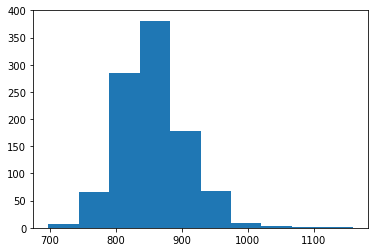

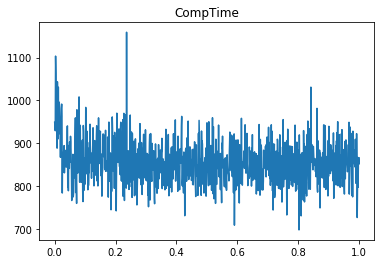

856.1348+-51.054972617366076


852.55

In [163]:
evaluateCompTime([0.1,0.001,0.1,0.001,-0.1], 0, 1000)

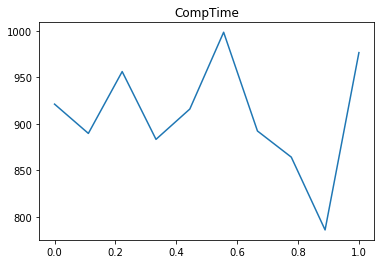

908.3799999999999+-57.85583462365746


904.0999999999999

In [103]:
evaluateCompTime([0.1,0.001,0.1,0.001,-0.1], 0, 10)

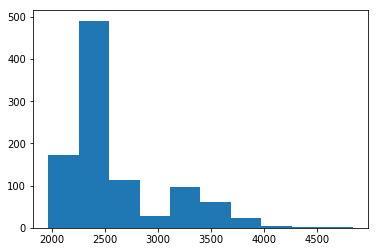

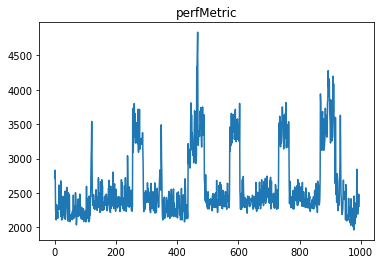

2593.968291457287+-475.0732968595906


0.0004154549231408392

In [162]:
evaluatePerfMetric([0.1,0.001,0.1,0.001,-0.1], -10, 1000)

3025.666666666667+-355.65084536596254
990.3699999999999+-57.69074535833279
2800.333333333333+-165.10198868174382
1007.5300000000001+-67.4006832309584
4007.0+-279.85455406080393
1037.1799999999998+-48.36518996137615
2723.5238095238096+-168.75518636524941
1029.94+-43.863725331987034
2647.2619047619046+-124.32362585437345
1034.81+-58.07029274939125
2686.9285714285716+-179.23895235360067
1070.1100000000001+-65.81798310492356
2716.4761904761904+-223.7267222718453
1067.2900000000002+-35.61234196174128
2737.8571428571427+-187.66796558316085
1063.06+-78.99723033119581
3078.095238095238+-168.04890768508335
1111.6299999999997+-67.98138053908585
3100.904761904762+-157.49816973345358
1143.61+-49.395008857170964
3272.666666666667+-208.3513516017732
1091.6299999999999+-47.40934612499945
3366.3571428571427+-196.69096759814337
1142.88+-49.90506587511933
3363.333333333333+-226.78267339543592
1093.65+-27.805907645678474
3463.452380952381+-227.56326024858666
1106.8600000000001+-51.964934330758055
3424.35

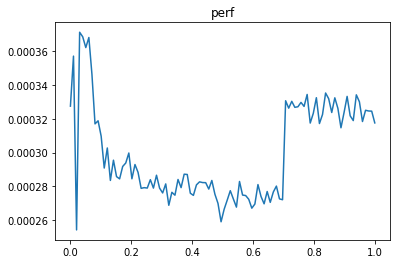

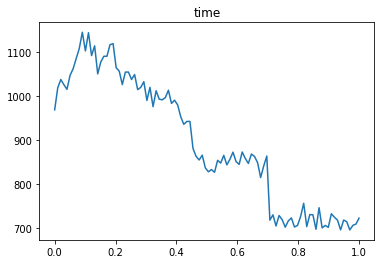

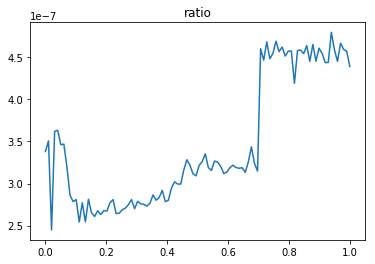

In [140]:
getTargetMetric([0.1,0.001,0.1,0.001,-0.1], 100)

step 0.0 903.2 2447.5
step 0.010101010101010102 925.7 2431.0
step 0.020202020202020204 963.35 3584.5
step 0.030303030303030304 916.45 2473.833333333333
step 0.04040404040404041 919.7 2459.0
step 0.05050505050505051 939.45 2285.166666666667
step 0.06060606060606061 950.9 2360.0
step 0.07070707070707072 1006.9 2472.416666666667
step 0.08080808080808081 1013.9 2613.166666666667
step 0.09090909090909091 973.65 2767.0
step 0.10101010101010102 1036.35 2722.5
step 0.11111111111111112 1036.8 3015.0
step 0.12121212121212122 1080.5 3110.916666666667
step 0.13131313131313133 1045.0 3115.5
step 0.14141414141414144 1001.6 3069.75
step 0.15151515151515152 984.4000000000001 2887.416666666667
step 0.16161616161616163 964.6500000000001 2896.083333333333
step 0.17171717171717174 982.1 2843.833333333333
step 0.18181818181818182 991.95 2843.916666666667
step 0.19191919191919193 939.5 2914.0
step 0.20202020202020204 978.65 2964.0
step 0.21212121212121213 953.5 3097.166666666667
step 0.22222222222222224 977

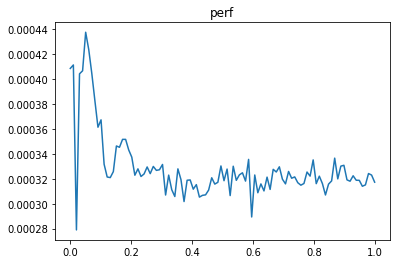

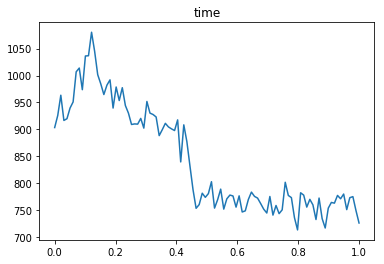

In [107]:
getTargetMetric([0.1,0.001,0.1,0.001,-0.1])

In [134]:
getTargetMetric([0.1,0.001,0.1,0.001,-0.1])

2810.1190476190473+-292.4384986799858
1071.5+-63.9044129931572
2742.190476190476+-243.48643957827178
1123.1299999999999+-39.52399397834183
2883.3571428571427+-198.64338367423926
1125.15+-58.43776604217517
4291.119047619048+-282.75142925951644
1217.6200000000001+-232.7948014883494
3284.285714285714+-405.17005751931384
1168.66+-184.8578708089001
2921.4761904761904+-271.61251912277106
1126.09+-47.16739233835169
3030.714285714286+-271.4630805130463
1107.66+-45.01611267090926
3132.5+-199.5618414713308
1163.0300000000002+-84.81860703878598
3415.8571428571427+-264.50515985862495
1168.1100000000001+-63.33513164113581
4481.261904761905+-371.16583656270484
1260.6799999999998+-38.7308610800225
3689.809523809524+-464.8354840272893
1390.01+-199.0992086875284
3468.904761904762+-173.48159540878746
1222.8500000000001+-84.78020110851352
4344.261904761905+-536.8102725428072
1294.42+-140.26713656448538
4824.166666666666+-616.8894513914914
1264.33+-115.55574455646936
5325.5+-274.4611604060374
1236.8300000

KeyboardInterrupt: 

2876.595238095238+-276.4043486372424
1000.85+-50.38059646332106
2788.952380952381+-175.59182724693758
1057.1799999999998+-56.535330546482164
2663.1428571428573+-148.44761324302598
1045.95+-51.55483003560385
2581.1190476190473+-212.5242603198275
1043.18+-74.96396200842108
2627.690476190476+-230.30332704713493
1070.5700000000002+-48.65558652405704
2647.5714285714284+-235.70311661849846
1054.11+-55.685302369655865
2698.809523809524+-171.01720484717757
1071.07+-67.74922951591407
2704.690476190476+-205.0245132183178
1049.94+-26.921225826473783
2701.0238095238096+-238.43528336582548
1057.0+-42.77728369123034
2675.214285714286+-202.79191607283013
1055.5000000000002+-41.82484907324831
2671.690476190476+-124.26796534459054
1056.5900000000001+-29.17267385756743
2606.5714285714284+-143.6094477023979
1048.6299999999999+-37.63158380934824
2680.785714285714+-189.92401810477057
1075.55+-52.43028228037685
2653.7619047619046+-255.3385374507401
1044.0700000000002+-39.21221875895321
2808.6428571428573+-1

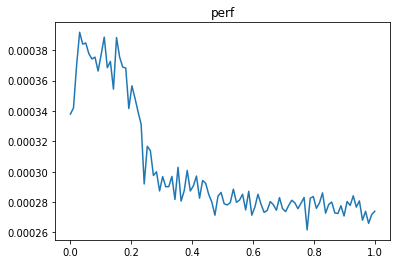

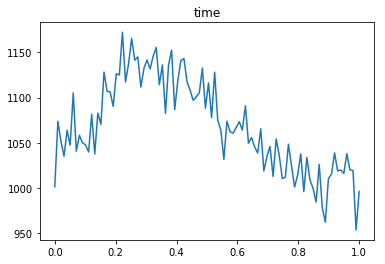

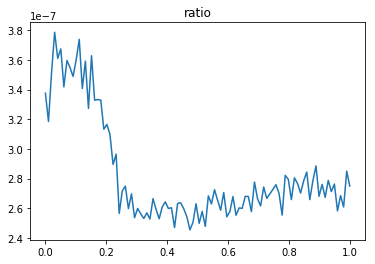

In [133]:
getTargetMetric([0.1,0.005,0.1,0.005,-0.1])

(([1257.7], [1257.7]), [2093.0, 2093.0, 7014.0, 2803.0, 2128.0, 2579.0, 2296.0, 2119.0, 2432.0, 2476.0, 2182.0, 2182.0, 2066.0, 2238.5])
(([1217.4], [1217.4]), [2132.0, 2132.0, 7079.0, 2890.0, 2196.0, 2464.0, 2231.0, 2136.0, 2364.0, 2431.0, 2410.0, 2069.0, 2228.0, 2272.3333333333335])
(([1256.1], [1256.1]), [2628.0, 2628.0, 8356.0, 3131.0, 2840.0, 2793.0, 2829.0, 2682.0, 2692.0, 2918.0, 2937.0, 2584.0, 2656.0, 2735.8333333333335])
(([1212.2], [1212.2]), [2890.0, 2890.0, 8469.0, 3218.0, 3340.0, 3020.0, 2972.0, 3241.0, 3119.0, 3386.0, 2788.0, 2836.0, 2783.0, 2967.0])
(([1192.0], [1192.0]), [3008.0, 3008.0, 8221.0, 3310.0, 2888.0, 3516.0, 3094.0, 2783.0, 3103.0, 3231.0, 3222.0, 2832.0, 3162.0, 3093.0])
([0.0, 0.25, 0.5, 0.75, 1.0], [0.000439882697947214, 0.00043840420868040335, 0.0003609963499257952, 0.0003274513370929598, 0.00032338040314756927])


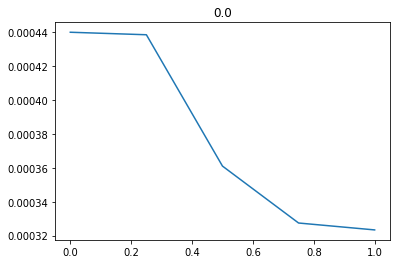

In [15]:
mainLoop()